In [393]:
!pip install pygwalker

In [394]:
pip install pygwalker ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [395]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import time
import pygwalker as pyg
import seaborn as sns

###
📘 DATASET DESCRIPTION

| Column Name | Description |
|--------------|-------------|
| FL_DATE | Date of flight (YYYY-MM-DD) |
| AIRLINE | Airline name (e.g., Delta Air Lines, Southwest Airlines) |
| AIRLINE_DOT | Official DOT code for the airline |
| AIRLINE_CODE | Airline abbreviation or internal code |
| DOT_CODE | Numeric DOT identifier for the airline |
| FL_NUMBER | Flight number |
| ORIGIN | Origin airport IATA code |
| ORIGIN_CITY | Origin city name |
| DEST | Destination airport IATA code |
| DEST_CITY | Destination city name |
| CRS_DEP_TIME | Scheduled departure time (local, in HHMM format) |
| DEP_TIME | Actual departure time (NaN if cancelled) |
| DEP_DELAY | Departure delay in minutes (negative if early) |
| TAXI_OUT | Taxi-out time before takeoff (in minutes) |
| WHEELS_OFF | Actual time when aircraft left the ground |
| WHEELS_ON | Actual time when aircraft landed |
| TAXI_IN | Taxi-in time after landing (in minutes) |
| CRS_ARR_TIME | Scheduled arrival time (local, in HHMM format) |
| ARR_TIME | Actual arrival time (NaN if cancelled or diverted) |
| ARR_DELAY | Arrival delay in minutes (negative if early) |
| CANCELLED | 1 if flight was cancelled, else 0 |
| CANCELLATION_CODE | Reason for cancellation (A=Carrier, B=Weather, C=NAS, D=Security) |
| DIVERTED | 1 if flight landed at a different airport, else 0 |
| CRS_ELAPSED_TIME | Scheduled flight time (in minutes) |
| ELAPSED_TIME | Actual flight time (NaN if cancelled or diverted) |
| AIR_TIME | Time spent flying (NaN if cancelled or diverted) |
| DISTANCE | Distance between airports (in miles) |
| DELAY_DUE_CARRIER | Delay minutes due to carrier issues |
| DELAY_DUE_WEATHER | Delay minutes due to weather |
| DELAY_DUE_NAS | Delay minutes due to National Airspace System (ATC etc.) |
| DELAY_DUE_SECURITY | Delay minutes due to security issues |
| DELAY_DUE_LATE_AIRCRAFT | Delay minutes due to previous aircraft arriving late |


# Data Preprocessing

In [398]:
df=pd.read_csv('flights_data.csv')

In [399]:
df=pd.DataFrame(df)
df

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,09-01-2019,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0,186.0,176.0,153.0,1065,NaN,NaN,NaN,NaN,NaN
1,19-11-2022,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0,235.0,236.0,189.0,1399,NaN,NaN,NaN,NaN,NaN
2,22-07-2022,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0,118.0,112.0,87.0,680,NaN,NaN,NaN,NaN,NaN
3,06-03-2023,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0,260.0,285.0,249.0,1589,0.0,0.0,24.0,0.0,0.0
4,23-02-2020,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0,181.0,182.0,153.0,985,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,09-03-2020,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2108,PHX,"Phoenix, AZ",SJC,"San Jose, CA",...,0,120.0,105.0,91.0,621,0.0,0.0,0.0,0.0,55.0
1048571,27-01-2019,Endeavor Air Inc.,Endeavor Air Inc.: 9E,9E,20363,5482,HPN,"White Plains, NY",ATL,"Atlanta, GA",...,0,157.0,164.0,144.0,780,NaN,NaN,NaN,NaN,NaN
1048572,07-05-2021,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2345,CLT,"Charlotte, NC",BDL,"Hartford, CT",...,0,122.0,109.0,92.0,644,NaN,NaN,NaN,NaN,NaN
1048573,19-12-2022,Envoy Air,Envoy Air: MQ,MQ,20398,3754,MIA,"Miami, FL",GSO,"Greensboro/High Point, NC",...,0,132.0,132.0,105.0,710,6.0,0.0,0.0,0.0,59.0


In [400]:
df.shape

(1048575, 32)

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 32 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   FL_DATE                  1048575 non-null  object 
 1   AIRLINE                  1048575 non-null  object 
 2   AIRLINE_DOT              1048575 non-null  object 
 3   AIRLINE_CODE             1048575 non-null  object 
 4   DOT_CODE                 1048575 non-null  int64  
 5   FL_NUMBER                1048575 non-null  int64  
 6   ORIGIN                   1048575 non-null  object 
 7   ORIGIN_CITY              1048575 non-null  object 
 8   DEST                     1048575 non-null  object 
 9   DEST_CITY                1048575 non-null  object 
 10  CRS_DEP_TIME             1048575 non-null  int64  
 11  DEP_TIME                 1021527 non-null  float64
 12  DEP_DELAY                1021518 non-null  float64
 13  TAXI_OUT                 1021103 non-null 

In [402]:
df.isnull().sum()

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     27048
DEP_DELAY                    27057
TAXI_OUT                     27472
WHEELS_OFF                   27472
WHEELS_ON                    27866
TAXI_IN                      27866
CRS_ARR_TIME                     0
ARR_TIME                     27866
ARR_DELAY                    30005
CANCELLED                        0
CANCELLATION_CODE          1020978
DIVERTED                         0
CRS_ELAPSED_TIME                 7
ELAPSED_TIME                 30005
AIR_TIME                     30005
DISTANCE                         0
DELAY_DUE_CARRIER           861303
DELAY_DUE_WEATHER   

In [403]:
#Filling the cancellation code column missing values with Not cancelled
df.fillna({"CANCELLATION_CODE":"Not Cancelled"}, inplace=True)
df["CANCELLATION_CODE"].value_counts()

CANCELLATION_CODE
Not Cancelled    1020978
B                   9984
D                   8511
A                   6830
C                   2272
Name: count, dtype: int64

In [404]:
df[['CANCELLATION_CODE']].isna().sum()

CANCELLATION_CODE    0
dtype: int64

In [405]:
# Check if any cancelled flights still have "Not Cancelled" (which would be wrong)
wrong_cancelled = df[(df["CANCELLED"] == 1) & (df["CANCELLATION_CODE"] == "Not Cancelled")]
print("Cancelled flights with wrong code:", wrong_cancelled.shape[0])

Cancelled flights with wrong code: 0


In [406]:
time_cols = ["CRS_DEP_TIME", "DEP_TIME", "CRS_ARR_TIME", "ARR_TIME", "WHEELS_OFF", "WHEELS_ON"]
print(df[time_cols].head(10))
#print(df["CRS_DEP_TIME"].dtype)

   CRS_DEP_TIME  DEP_TIME  CRS_ARR_TIME  ARR_TIME  WHEELS_OFF  WHEELS_ON
0          1155    1151.0          1501    1447.0      1210.0     1443.0
1          2120    2114.0          2315    2310.0      2123.0     2232.0
2           954    1000.0          1252    1252.0      1020.0     1247.0
3          1609    1608.0          1829    1853.0      1635.0     1844.0
4          1840    1838.0          2041    2040.0      1853.0     2026.0
5          1010    1237.0          1110    1331.0      1252.0     1328.0
6          1010    1001.0          1159    1130.0      1024.0     1122.0
7          1643    1637.0          1945    2008.0      1659.0     1927.0
8           530     527.0           717     706.0       538.0      658.0
9          2125    2116.0          2355    2356.0      2135.0     2353.0


In [407]:
def to_time_only(val):
    if pd.isna(val):
        return np.nan
    try:
        # Convert to integer safely
        val = int(val)
        hour = val // 100
        minute = val % 100
        # Valid hour: 0–23, valid minute: 0–59
        if 0 <= hour < 24 and 0 <= minute < 60:
            return time(hour, minute)
        else:
            return np.nan
    except Exception:
        return np.nan

time_cols = ["CRS_DEP_TIME", "DEP_TIME", "CRS_ARR_TIME", "ARR_TIME", "WHEELS_OFF", "WHEELS_ON"]

for col in time_cols:
    df[col] = df[col].apply(to_time_only)

In [408]:
df[time_cols].head()

,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME,ARR_TIME,WHEELS_OFF,WHEELS_ON
0,11:55:00,11:51:00,15:01:00,14:47:00,12:10:00,14:43:00
1,21:20:00,21:14:00,23:15:00,23:10:00,21:23:00,22:32:00
2,09:54:00,10:00:00,12:52:00,12:52:00,10:20:00,12:47:00
3,16:09:00,16:08:00,18:29:00,18:53:00,16:35:00,18:44:00
4,18:40:00,18:38:00,20:41:00,20:40:00,18:53:00,20:26:00


In [409]:
cancelled=df[df['CANCELLED']==1]
cancelled.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
14,07-04-2020,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,687,SJC,"San Jose, CA",LAX,"Los Angeles, CA",...,0,80.0,NaN,NaN,308,NaN,NaN,NaN,NaN,NaN
45,02-01-2022,Republic Airline,Republic Airline: YX,YX,20452,3467,ORD,"Chicago, IL",DCA,"Washington, DC",...,0,126.0,NaN,NaN,612,NaN,NaN,NaN,NaN,NaN
80,20-04-2020,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,246,BNA,"Nashville, TN",ATL,"Atlanta, GA",...,0,65.0,NaN,NaN,214,NaN,NaN,NaN,NaN,NaN
191,31-12-2021,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,1097,IAD,"Washington, DC",LAX,"Los Angeles, CA",...,0,364.0,NaN,NaN,2288,NaN,NaN,NaN,NaN,NaN
236,14-04-2020,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,446,LAS,"Las Vegas, NV",HOU,"Houston, TX",...,0,175.0,NaN,NaN,1235,NaN,NaN,NaN,NaN,NaN


In [410]:
cancelled[["DEP_TIME", "ARR_TIME", "WHEELS_ON", "WHEELS_OFF",
               "TAXI_OUT", "TAXI_IN", "ARR_DELAY", "DEP_DELAY",
               "ELAPSED_TIME", "AIR_TIME","DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", "DELAY_DUE_NAS",
              "DELAY_DUE_SECURITY", "DELAY_DUE_LATE_AIRCRAFT","CRS_ARR_TIME","CRS_ELAPSED_TIME"]].isna().sum()

DEP_TIME                   27048
ARR_TIME                   27597
WHEELS_ON                  27597
WHEELS_OFF                 27472
TAXI_OUT                   27472
TAXI_IN                    27597
ARR_DELAY                  27597
DEP_DELAY                  27057
ELAPSED_TIME               27597
AIR_TIME                   27597
DELAY_DUE_CARRIER          27597
DELAY_DUE_WEATHER          27597
DELAY_DUE_NAS              27597
DELAY_DUE_SECURITY         27597
DELAY_DUE_LATE_AIRCRAFT    27597
CRS_ARR_TIME                   1
CRS_ELAPSED_TIME               7
dtype: int64

In [411]:
cancelled_mask=df["CANCELLED"] == 1
cols = ["DEP_TIME", "ARR_TIME", "WHEELS_ON", "WHEELS_OFF",
               "TAXI_OUT", "TAXI_IN", "ARR_DELAY", "DEP_DELAY",
               "ELAPSED_TIME", "AIR_TIME", "DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", "DELAY_DUE_NAS",
              "DELAY_DUE_SECURITY", "DELAY_DUE_LATE_AIRCRAFT","CRS_ARR_TIME","CRS_ELAPSED_TIME"]
df.loc[cancelled_mask, cols] = df.loc[cancelled_mask, cols].astype(object)
df.loc[cancelled_mask, cols] = df.loc[cancelled_mask, cols].fillna("Not Applicable (Cancelled)")

C:\Users\Meghana\AppData\Local\Temp\ipykernel_16132\1125681498.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan ... nan nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[cancelled_mask, cols] = df.loc[cancelled_mask, cols].astype(object)
C:\Users\Meghana\AppData\Local\Temp\ipykernel_16132\1125681498.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan ... nan nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[cancelled_mask, cols] = df.loc[cancelled_mask, cols].astype(object)
C:\Users\Meghana\AppData\Local\Temp\ipykernel_16132\1125681498.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan

In [412]:
df.loc[cancelled_mask ,cols].isna().all()

DEP_TIME                   False
ARR_TIME                   False
WHEELS_ON                  False
WHEELS_OFF                 False
TAXI_OUT                   False
TAXI_IN                    False
ARR_DELAY                  False
DEP_DELAY                  False
ELAPSED_TIME               False
AIR_TIME                   False
DELAY_DUE_CARRIER          False
DELAY_DUE_WEATHER          False
DELAY_DUE_NAS              False
DELAY_DUE_SECURITY         False
DELAY_DUE_LATE_AIRCRAFT    False
CRS_ARR_TIME               False
CRS_ELAPSED_TIME           False
dtype: bool

In [413]:
#Checking for missing values in the columns that are not diverted and not cancelled (normal flights missing value)
df.loc[cancelled_mask ,cols].isnull().sum()

DEP_TIME                   0
ARR_TIME                   0
WHEELS_ON                  0
WHEELS_OFF                 0
TAXI_OUT                   0
TAXI_IN                    0
ARR_DELAY                  0
DEP_DELAY                  0
ELAPSED_TIME               0
AIR_TIME                   0
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_NAS              0
DELAY_DUE_SECURITY         0
DELAY_DUE_LATE_AIRCRAFT    0
CRS_ARR_TIME               0
CRS_ELAPSED_TIME           0
dtype: int64

In [414]:
non_cancelled = df[df["CANCELLED"] == 0]
non_cancelled.shape

(1020978, 32)

In [415]:
#How many null values in the respective columns of non-cancelled fli
non_cancelled[["DEP_TIME", "ARR_TIME", "WHEELS_ON", "WHEELS_OFF",
               "TAXI_OUT", "TAXI_IN", "ARR_DELAY", "DEP_DELAY",
               "ELAPSED_TIME", "AIR_TIME","DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", "DELAY_DUE_NAS",
              "DELAY_DUE_SECURITY", "DELAY_DUE_LATE_AIRCRAFT","CRS_ARR_TIME","CRS_ELAPSED_TIME"]].isna().sum()

DEP_TIME                       84
ARR_TIME                      758
WHEELS_ON                     661
WHEELS_OFF                    150
TAXI_OUT                        0
TAXI_IN                       269
ARR_DELAY                    2408
DEP_DELAY                       0
ELAPSED_TIME                 2408
AIR_TIME                     2408
DELAY_DUE_CARRIER          833706
DELAY_DUE_WEATHER          833706
DELAY_DUE_NAS              833706
DELAY_DUE_SECURITY         833706
DELAY_DUE_LATE_AIRCRAFT    833706
CRS_ARR_TIME                    9
CRS_ELAPSED_TIME                0
dtype: int64

In [416]:
#To check how many flights are diverted from the non-cancelled flights
diverted = df[(df["DIVERTED"] == 1) & (df["CANCELLED"] == 0)]
diverted[["DEP_TIME", "ARR_TIME", "WHEELS_ON", "WHEELS_OFF",
               "TAXI_OUT", "TAXI_IN", "ARR_DELAY", "DEP_DELAY",
               "ELAPSED_TIME", "AIR_TIME", "DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", "DELAY_DUE_NAS",
              "DELAY_DUE_SECURITY", "DELAY_DUE_LATE_AIRCRAFT","CRS_ARR_TIME"]].isna().sum()

DEP_TIME                      0
ARR_TIME                    270
WHEELS_ON                   269
WHEELS_OFF                    0
TAXI_OUT                      0
TAXI_IN                     268
ARR_DELAY                  2407
DEP_DELAY                     0
ELAPSED_TIME               2407
AIR_TIME                   2407
DELAY_DUE_CARRIER          2407
DELAY_DUE_WEATHER          2407
DELAY_DUE_NAS              2407
DELAY_DUE_SECURITY         2407
DELAY_DUE_LATE_AIRCRAFT    2407
CRS_ARR_TIME                  0
dtype: int64

In [417]:
#Fill the missing values in non-cancelled but diverted flights with NaN values 
diverted = (df["DIVERTED"] == 1) & (df["CANCELLED"] == 0)
arrival_cols = ["ARR_TIME", "WHEELS_ON", "TAXI_IN", "ARR_DELAY",
                "ELAPSED_TIME", "AIR_TIME", "DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", "DELAY_DUE_NAS",
              "DELAY_DUE_SECURITY", "DELAY_DUE_LATE_AIRCRAFT"]
df[arrival_cols] = df[arrival_cols].fillna("Not Applicable")

In [418]:
df.loc[diverted, arrival_cols].isna().all()

ARR_TIME                   False
WHEELS_ON                  False
TAXI_IN                    False
ARR_DELAY                  False
ELAPSED_TIME               False
AIR_TIME                   False
DELAY_DUE_CARRIER          False
DELAY_DUE_WEATHER          False
DELAY_DUE_NAS              False
DELAY_DUE_SECURITY         False
DELAY_DUE_LATE_AIRCRAFT    False
dtype: bool

In [443]:
#Checking for missing values in the columns that are not diverted and not cancelled (normal flights missing value)
normal_flights = (df["DIVERTED"] == 0) & (df["CANCELLED"] == 0)
cols=["DEP_TIME", "ARR_TIME", "WHEELS_ON", "WHEELS_OFF",
               "TAXI_OUT", "TAXI_IN", "ARR_DELAY", "DEP_DELAY",
               "ELAPSED_TIME", "AIR_TIME", "DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", "DELAY_DUE_NAS",
              "DELAY_DUE_SECURITY", "DELAY_DUE_LATE_AIRCRAFT","CRS_ARR_TIME","CRS_ELAPSED_TIME"]
df.loc[normal_flights, cols].isna().sum()

DEP_TIME                    84
ARR_TIME                     0
WHEELS_ON                    0
WHEELS_OFF                 150
TAXI_OUT                     0
TAXI_IN                      0
ARR_DELAY                    0
DEP_DELAY                    0
ELAPSED_TIME                 0
AIR_TIME                     0
DELAY_DUE_CARRIER            0
DELAY_DUE_WEATHER            0
DELAY_DUE_NAS                0
DELAY_DUE_SECURITY           0
DELAY_DUE_LATE_AIRCRAFT      0
CRS_ARR_TIME                 9
CRS_ELAPSED_TIME             0
dtype: int64

In [451]:
from datetime import time
import datetime
# Define a function to convert datetime.time to pandas Timestamp with a fixed date (needed for timedelta addition)
def time_to_timestamp(t):
    if pd.isna(t):
        return pd.NaT
    if isinstance(t, datetime.time):
        return pd.Timestamp.combine(pd.Timestamp('2025-01-01').date(), t)
    return pd.NaT

# Apply conversion to CRS_DEP_TIME
df['CRS_DEP_TIMESTAMP'] = df['CRS_DEP_TIME'].apply(time_to_timestamp)

# Create mask for normal flights with missing DEP_TIME but known CRS_DEP_TIME and DEP_DELAY
mask = (df['CANCELLED'] == 0) & (df['DEP_TIME'].isna()) & (df['CRS_DEP_TIMESTAMP'].notna()) & (df['DEP_DELAY'].notna())

# Impute DEP_TIME by adding delay minutes to scheduled time
df.loc[mask, 'DEP_TIME'] = (df.loc[mask, 'CRS_DEP_TIMESTAMP'] + pd.to_timedelta(df.loc[mask, 'DEP_DELAY'], unit='m')).dt.time

# Optional: drop the helper column after imputation
#df.drop(columns=['CRS_DEP_TIMESTAMP'], inplace=True)

#df['CRS_ARR_TIME_TS'] = df['CRS_ARR_TIME'].apply(time_to_timestamp)

# Mask for normal flights missing CRS_ARR_TIME but have CRS_DEP_TIME and CRS_ELAPSED_TIME
mask_arr = (df['CANCELLED'] == 0) & (df['CRS_ARR_TIME'].isna()) & (df['CRS_DEP_TIMESTAMP'].notna()) & (df['CRS_ELAPSED_TIME'].notna())

# Impute CRS_ARR_TIME by adding CRS_ELAPSED_TIME (minutes) to CRS_DEP_TIMESTAMP
df.loc[mask_arr, 'CRS_ARR_TIME'] = (df.loc[mask_arr, 'CRS_DEP_TIMESTAMP'] + pd.to_timedelta(df.loc[mask_arr, 'CRS_ELAPSED_TIME'], unit='m')).dt.time

# drop the helper column after imputation
df.drop(columns=['CRS_DEP_TIMESTAMP'], inplace=True)

In [453]:
df.loc[normal_flights, cols].isna().sum()

DEP_TIME                     0
ARR_TIME                     0
WHEELS_ON                    0
WHEELS_OFF                 150
TAXI_OUT                     0
TAXI_IN                      0
ARR_DELAY                    0
DEP_DELAY                    0
ELAPSED_TIME                 0
AIR_TIME                     0
DELAY_DUE_CARRIER            0
DELAY_DUE_WEATHER            0
DELAY_DUE_NAS                0
DELAY_DUE_SECURITY           0
DELAY_DUE_LATE_AIRCRAFT      0
CRS_ARR_TIME                 0
CRS_ELAPSED_TIME             0
dtype: int64

In [455]:
# Define mask for cancelled or diverted flights
mask = (df['CANCELLED'] == 0) | (df['DIVERTED'] == 0)

# Convert 'WHEELS_OFF' column to object dtype to allow string placeholders
df.loc[mask, 'WHEELS_OFF'] = df.loc[mask, 'WHEELS_OFF'].astype(object)

# Fill missing WHEELS_OFF values for cancelled/diverted flights with placeholder
df.loc[mask, 'WHEELS_OFF'] = df.loc[mask, 'WHEELS_OFF'].fillna("Not Recorded")

In [457]:
df.loc[normal_flights, cols].isna().sum()

DEP_TIME                   0
ARR_TIME                   0
WHEELS_ON                  0
WHEELS_OFF                 0
TAXI_OUT                   0
TAXI_IN                    0
ARR_DELAY                  0
DEP_DELAY                  0
ELAPSED_TIME               0
AIR_TIME                   0
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_NAS              0
DELAY_DUE_SECURITY         0
DELAY_DUE_LATE_AIRCRAFT    0
CRS_ARR_TIME               0
CRS_ELAPSED_TIME           0
dtype: int64

In [465]:
# Check if the delay columns are null
delay_cols = [
    "DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", "DELAY_DUE_NAS",
    "DELAY_DUE_SECURITY", "DELAY_DUE_LATE_AIRCRAFT"
]
df[delay_cols].isnull().sum()

DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_NAS              0
DELAY_DUE_SECURITY         0
DELAY_DUE_LATE_AIRCRAFT    0
dtype: int64

In [469]:
df.info()   #The missing values are filled (no null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 32 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   FL_DATE                  1048575 non-null  object
 1   AIRLINE                  1048575 non-null  object
 2   AIRLINE_DOT              1048575 non-null  object
 3   AIRLINE_CODE             1048575 non-null  object
 4   DOT_CODE                 1048575 non-null  int64 
 5   FL_NUMBER                1048575 non-null  int64 
 6   ORIGIN                   1048575 non-null  object
 7   ORIGIN_CITY              1048575 non-null  object
 8   DEST                     1048575 non-null  object
 9   DEST_CITY                1048575 non-null  object
 10  CRS_DEP_TIME             1048575 non-null  object
 11  DEP_TIME                 1048575 non-null  object
 12  DEP_DELAY                1048575 non-null  object
 13  TAXI_OUT                 1048575 non-null  object
 14  WH

In [471]:
df["FL_DATE"] = pd.to_datetime(df["FL_DATE"], format="%d-%m-%Y", errors="coerce")

In [473]:
df[['FL_DATE']].isna().sum()

FL_DATE    0
dtype: int64

In [475]:
# Derive hour from scheduled departure time
df["DEP_HOUR"] = df["CRS_DEP_TIME"].apply(lambda t: t.hour if pd.notna(t) else np.nan)

# Derive date-based features
df["MONTH"] = df["FL_DATE"].dt.month
df["DAY_OF_WEEK"] = df["FL_DATE"].dt.dayofweek  # Monday=0, Sunday=6
df["DAY_NAME"] = df["FL_DATE"].dt.day_name()

# Create route feature (Origin → Destination)
df["ROUTE"] = df["ORIGIN"] + "-" + df["DEST"]

In [477]:
df.isnull().sum()

FL_DATE                    0
AIRLINE                    0
AIRLINE_DOT                0
AIRLINE_CODE               0
DOT_CODE                   0
FL_NUMBER                  0
ORIGIN                     0
ORIGIN_CITY                0
DEST                       0
DEST_CITY                  0
CRS_DEP_TIME               0
DEP_TIME                   0
DEP_DELAY                  0
TAXI_OUT                   0
WHEELS_OFF                 0
WHEELS_ON                  0
TAXI_IN                    0
CRS_ARR_TIME               0
ARR_TIME                   0
ARR_DELAY                  0
CANCELLED                  0
CANCELLATION_CODE          0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ELAPSED_TIME               0
AIR_TIME                   0
DISTANCE                   0
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_NAS              0
DELAY_DUE_SECURITY         0
DELAY_DUE_LATE_AIRCRAFT    0
DEP_HOUR                   0
MONTH                      0
DAY_OF_WEEK   

# Exploratory Data Analysis

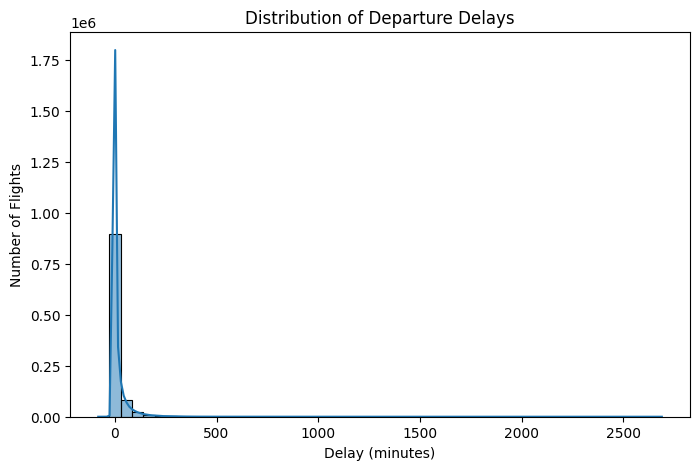

In [483]:
import seaborn as sns
# Create a numeric-only series for plotting
dep_delay_numeric = pd.to_numeric(df['DEP_DELAY'], errors='coerce')

plt.figure(figsize=(8,5))
sns.histplot(dep_delay_numeric.dropna(), bins=50, kde=True)
plt.title("Distribution of Departure Delays")
plt.xlabel("Delay (minutes)")
plt.ylabel("Number of Flights")
plt.show()


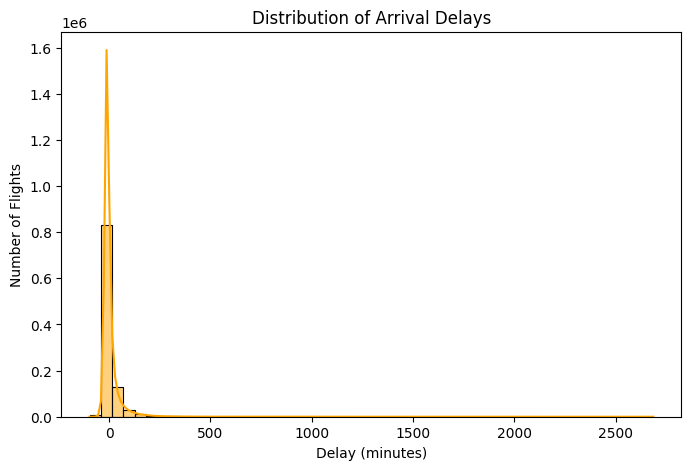

In [485]:
plt.figure(figsize=(8,5))
arr_delay_numeric = pd.to_numeric(df['ARR_DELAY'], errors='coerce')
sns.histplot(arr_delay_numeric, bins=50, kde=True, color='orange')
plt.title("Distribution of Arrival Delays")
plt.xlabel("Delay (minutes)")
plt.ylabel("Number of Flights")
plt.show()


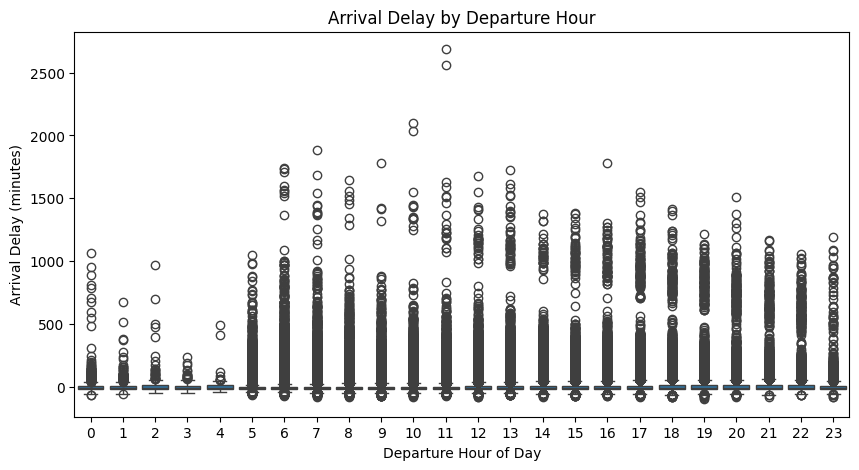

In [491]:
plt.figure(figsize=(10,5))
arr_delay_numeric = pd.to_numeric(df['ARR_DELAY'], errors='coerce')
sns.boxplot(x='DEP_HOUR', y=arr_delay_numeric, data=df)
plt.title("Arrival Delay by Departure Hour")
plt.xlabel("Departure Hour of Day")
plt.ylabel("Arrival Delay (minutes)")
plt.show()

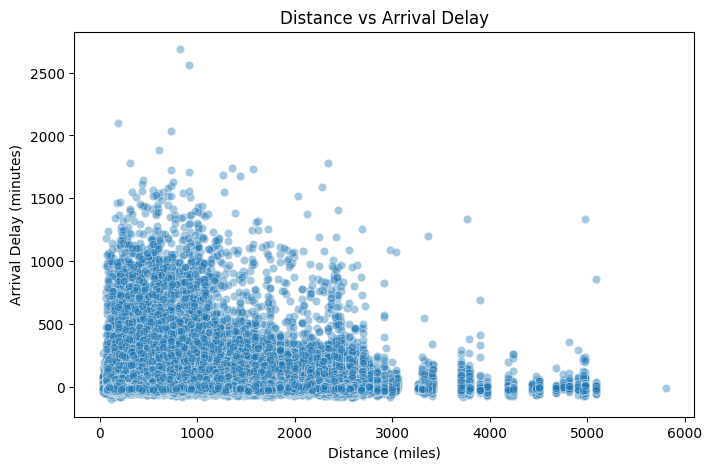

In [493]:
plt.figure(figsize=(8,5))
arr_delay_numeric = pd.to_numeric(df['ARR_DELAY'], errors='coerce')
sns.scatterplot(x='DISTANCE', y=arr_delay_numeric, data=df, alpha=0.4)
plt.title("Distance vs Arrival Delay")
plt.xlabel("Distance (miles)")
plt.ylabel("Arrival Delay (minutes)")
plt.show()

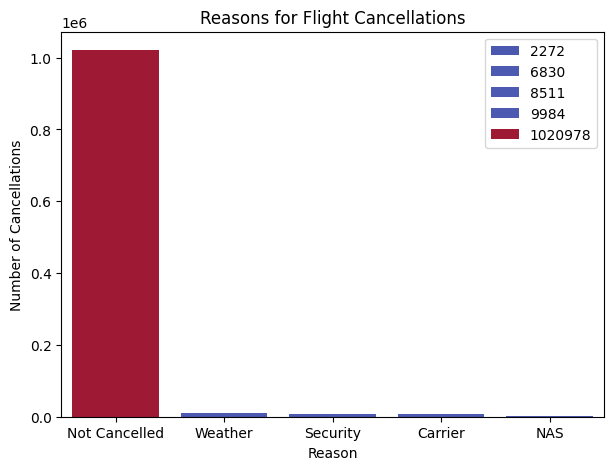

In [495]:
cancel_reason = df["CANCELLATION_CODE"].value_counts().rename({
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'NAS',
    'D': 'Security'
})

plt.figure(figsize=(7,5))
sns.barplot(x=cancel_reason.index, y=cancel_reason.values,hue=cancel_reason.values, palette="coolwarm")
plt.title("Reasons for Flight Cancellations")
plt.xlabel("Reason")
plt.ylabel("Number of Cancellations")
plt.show()


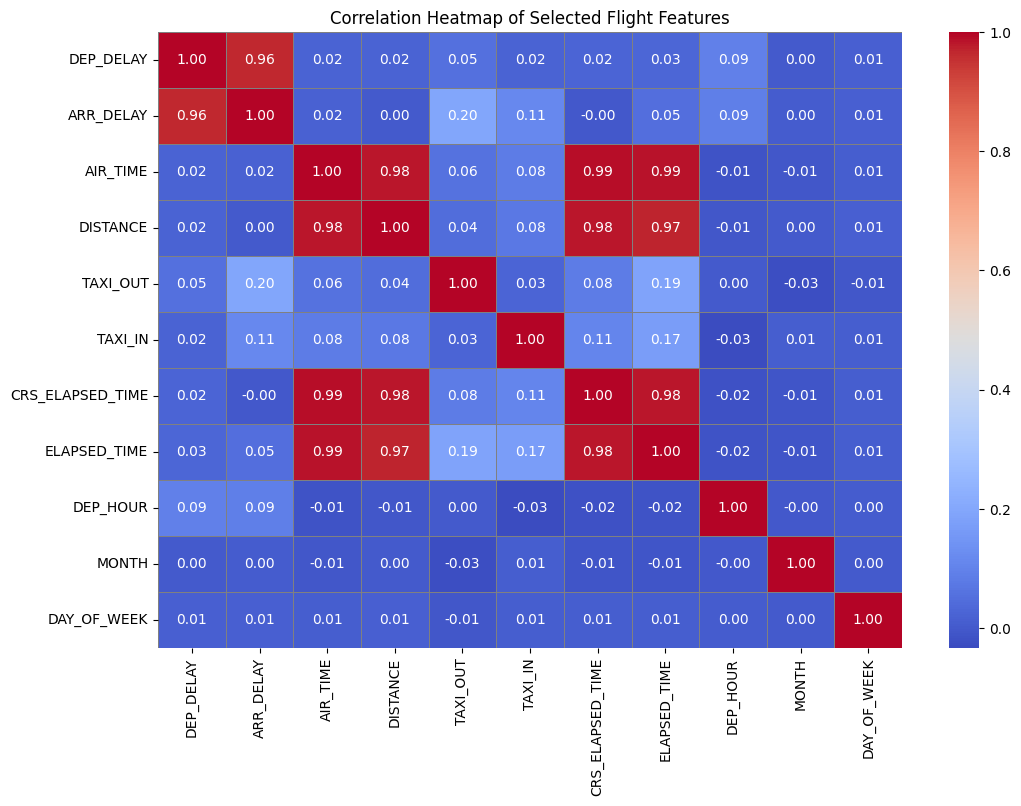

In [517]:
# List of columns intended for numeric correlation (based on your dataset info)
cols_for_corr = [
    'DEP_DELAY', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'TAXI_OUT', 'TAXI_IN',
    'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'DEP_HOUR', 'MONTH', 'DAY_OF_WEEK'
]

# Convert columns to numeric, coercing errors to NaN (to handle strings like "Not Applicable")
for col in cols_for_corr:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Compute correlation matrix on these numeric columns; NaNs are automatically handled
corr_matrix = df[cols_for_corr].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='gray')
plt.title('Correlation Heatmap of Selected Flight Features')
plt.show()